# Team 8 : Mobile Price Prediction

# **1.Problem Statement** 

A company has started a mobile production. They wants to give tough fight to big companies like Apple,Samsung etc.

They does not know how to estimate price of mobiles their company creates. They wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. 

To solve this problem we used various Machine learning methods to determine the price of mobile depending upon different features

**Data Dictionary**

**battery_power** : Total energy a battery can store in one time measured in mAh

**blue** : Has bluetooth or not

**clock_speed** : speed at which microprocessor executes instructions

**dual_sim** : Has dual sim support or not

**fc** : Front Camera mega pixels

**four_g** : Has 4G or not

**int_memory** : Internal Memory in Gigabytes

**m_dep** : Mobile Depth in cm

**mobile_wt** : Weight of mobile phone

**n_cores** : Number of cores of processor

**pc** : Primary Camera mega pixels

**px_height** : Pixel Resolution Height

**px_width** : Pixel Resolution Width

**ram** : Random Access Memory in Mega Bytes

**sc_h** : Screen Height of mobile in cm

**sc_w** : Screen Width of mobile in cm

**talk_time** : longest time that a single battery charge will last when you are

**three_g** : Has 3G or not

**touch_screen** : Has touch screen or not

**wifi** : Has wifi or not

**price_range** : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# 2.Data Collection

**Import libraries**

In [80]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import get_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# import function to perform feature selection
from sklearn.feature_selection import RFE
plt.rcParams['figure.figsize'] = [15,8]

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import sklearn
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection

from sklearn.ensemble import StackingClassifier

from sklearn.preprocessing import label_binarize

from sklearn.metrics import plot_roc_curve

**Read the Data**

In [81]:
ds = pd.read_csv('train.csv')
ds.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.200000,0,1,0,7,0.600000,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.500000,1,0,1,53,0.700000,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.500000,1,2,1,41,0.900000,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.500000,0,0,0,10,0.800000,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.200000,0,13,1,44,0.600000,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# 3.Data Preprocessing

**3.a Exploratory data analysis**

**Checking DataTypes**

In [82]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**As from above we can see the columns such as 'blue','dual_sim','four_g','three_g','touch_screen','wifi' are mentioned as numerical. So we changed them to Categorical**

In [83]:
ds[['blue','dual_sim','four_g','three_g','touch_screen','wifi']] = ds[['blue','dual_sim','four_g','three_g','touch_screen','wifi']].astype('object')

In [84]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

**Checking the Shape of the data**

In [85]:
ds.shape

(2000, 21)

**Checking the Null Values**

In [86]:
ds.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**There are no null values in our Data**

# 4.Summary Statstics of data

**Distribution of the Numerical Data**

In [88]:
df_num = ds.select_dtypes(include=np.number)
df_cat = ds.select_dtypes(include='object')

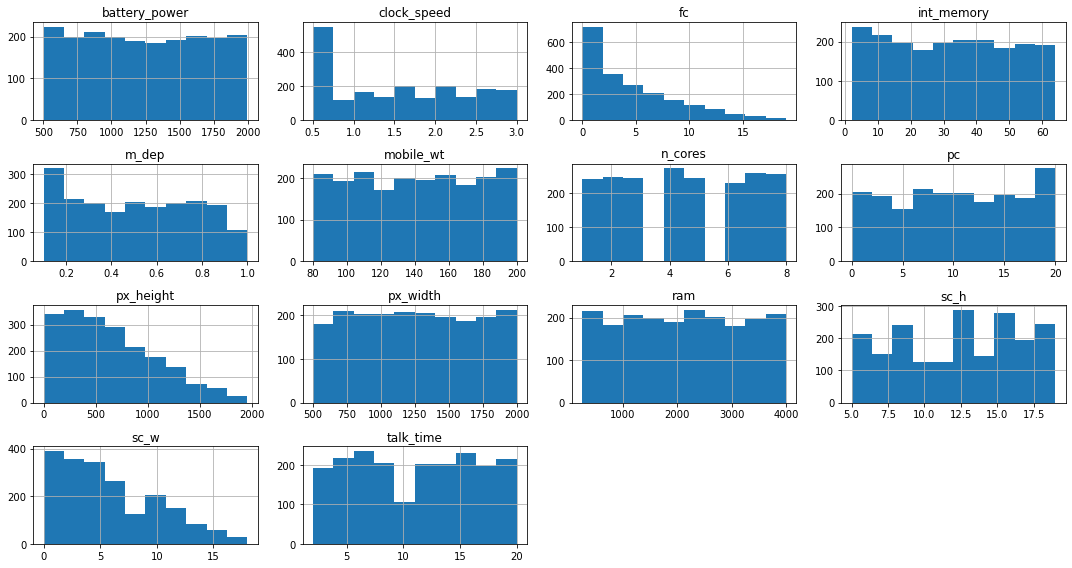

Skewness:


battery_power    0.031898
clock_speed      0.178084
fc               1.019811
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
dtype: float64

In [182]:
ds.drop('price_range', axis = 1).hist()
plt.tight_layout()
plt.show()  

print('Skewness:')

df_num.drop('price_range', axis = 1).skew()

**Checking Outlier**

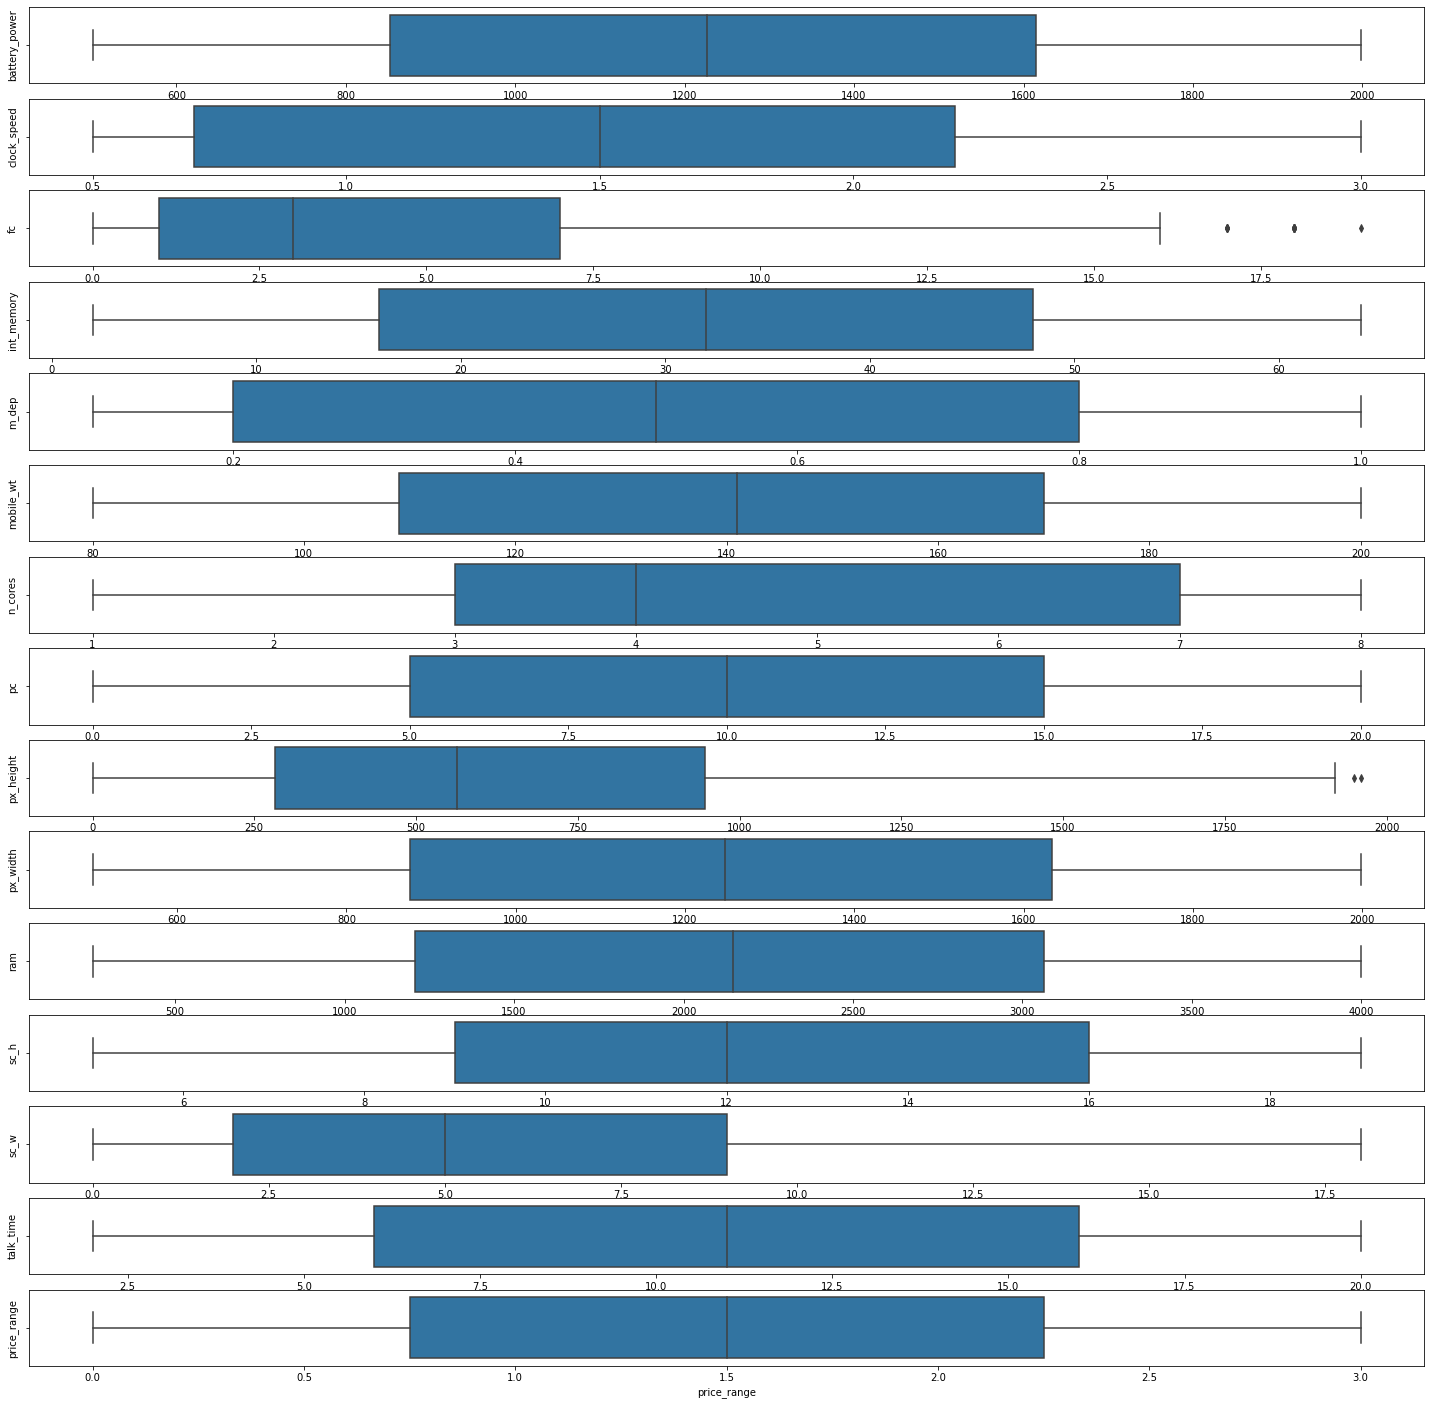

In [89]:
plt.figure(figsize = (25,25))
for i,col in enumerate(df_num,1):
    plt.subplot(df_num.shape[1],1,i)
    sns.boxplot(ds[col])
    plt.ylabel(col)
plt.show()

**Distribution of the Categorical Data**

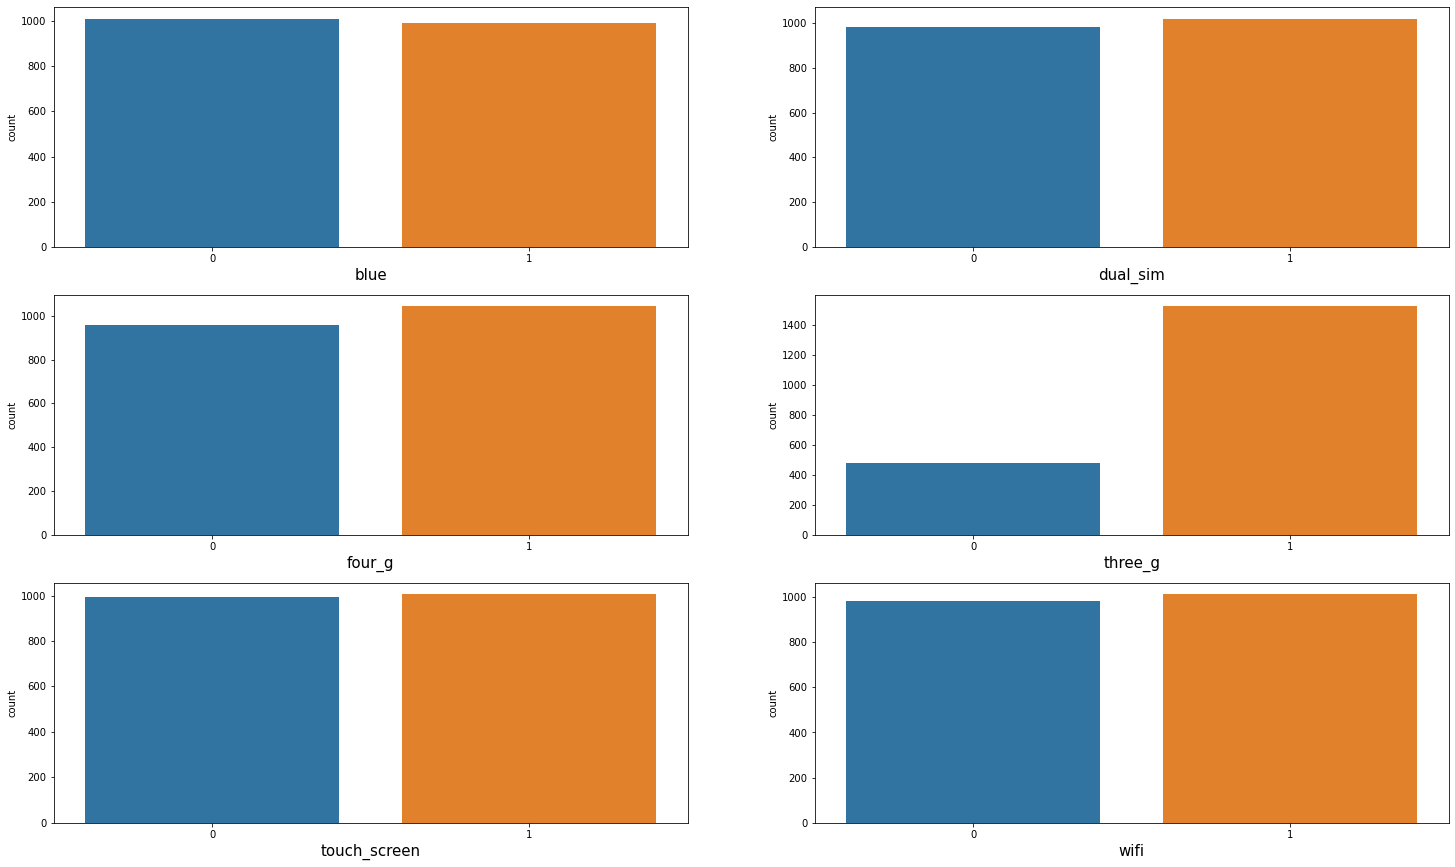

In [90]:
fig,ax = plt.subplots(3,2, figsize = (25,15))
for variable,subplot in zip(df_cat,ax.flatten()):
    boxplot = sns.countplot(x =variable, data=ds , ax=subplot)
    boxplot.set_xlabel(variable,fontsize=15)
plt.show()

 **Checking the imbalance of data**

<AxesSubplot:xlabel='price_range', ylabel='count'>

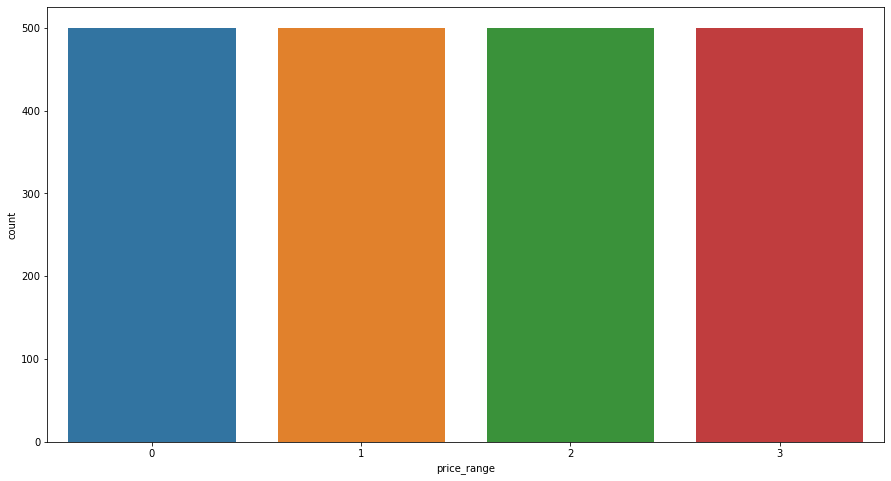

In [91]:
sns.countplot(ds.price_range)

Our data is very balanced data so we dont have to impute the data using SMOTE techniques

**Bivariate Analysis**

<AxesSubplot:>

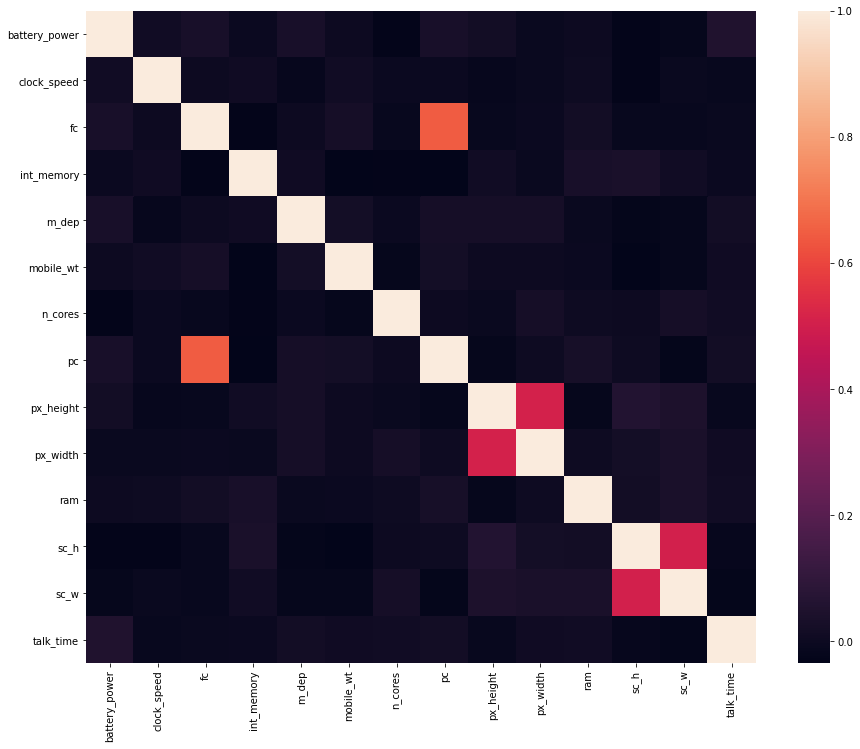

In [186]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(ds.drop('price_range',axis=1).corr())

**From the corelation Plot we can see that there is no much corelation between the features.**

# 5.Scaling the Data

In [93]:
scale = StandardScaler()
df_num_scaled = scale.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled,columns=df_num.columns)
df_num_scaled = df_num_scaled.drop('price_range',axis=1)
df_num_scaled.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240


# Dummy encoding of categorical variables

**We dont have to do the dummy encoding of the categorical variables as they are already binary classified**

# 6.Data Preparation

**Train Test Split**

In [94]:
x = ds.drop('price_range', axis=1)
y = ds['price_range']

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# 7.Model Building

**Creating a summary Table**

In [96]:
cols = ['Algorithm', 'Accuracy', 'F1_score']
result_table = pd.DataFrame(columns=cols)

# 7.a Logistic Regression

In [97]:
lr = LogisticRegression()
model_lr=lr.fit(x_train,y_train)

In [98]:
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

confusion matrix:
 [[84 10  1  0]
 [16 53 19  4]
 [ 0 29 43 27]
 [ 0  2 34 78]]


Text(114.0, 0.5, 'Actual')

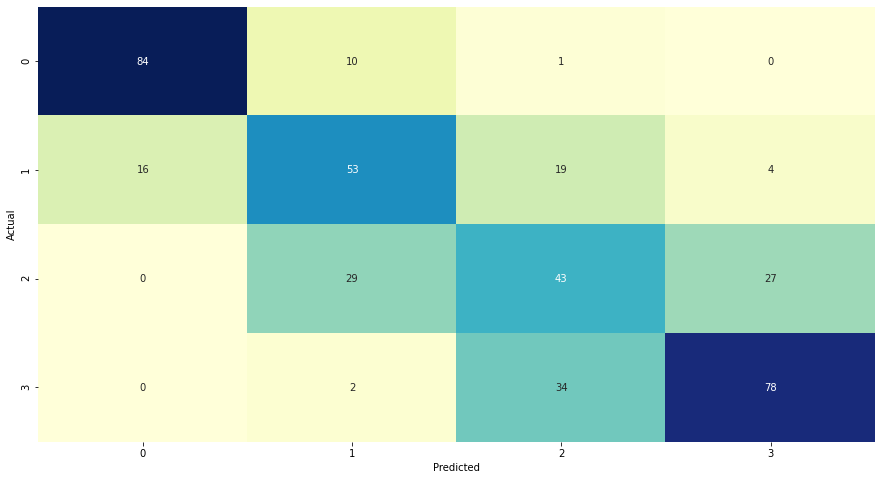

In [99]:
sns.heatmap(cm,annot=True,cmap="YlGnBu",cbar=False,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        95
           1       0.56      0.58      0.57        92
           2       0.44      0.43      0.44        99
           3       0.72      0.68      0.70       114

    accuracy                           0.65       400
   macro avg       0.64      0.64      0.64       400
weighted avg       0.64      0.65      0.64       400



In [101]:
acc_logreg = model_lr.score(x_test,y_test)
f1_logreg = metrics.f1_score(y_test,y_pred,average='weighted')

In [102]:
log_reg_metrics = pd.Series({'Algorithm':'Logistic Regressiom',
                            'Accuracy':acc_logreg*100,
                            'F1_score': "{:.2f}".format(f1_logreg)})

result_table = result_table.append(log_reg_metrics,ignore_index=True)
result_table

,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,64.500000,0.64


# 7.b Naive Baye's Algorithm

In [103]:
gauss = GaussianNB()
model_gauss = gauss.fit(x_train, y_train)

In [104]:
y_pred_gauss = model_gauss.predict(x_test)

In [105]:
print(classification_report(y_test,y_pred_gauss))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        95
           1       0.76      0.75      0.75        92
           2       0.72      0.71      0.71        99
           3       0.89      0.93      0.91       114

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [106]:
cm_gauss = confusion_matrix(y_test, y_pred_gauss)
cm_gauss

array([[ 89,   6,   0,   0],
       [  4,  69,  19,   0],
       [  0,  16,  70,  13],
       [  0,   0,   8, 106]], dtype=int64)

Text(114.0, 0.5, 'Actual')

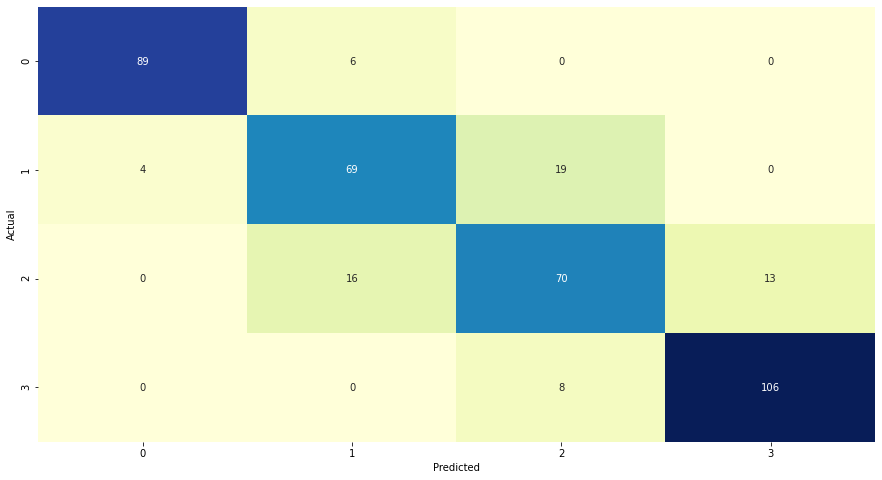

In [107]:
sns.heatmap(cm_gauss,annot=True,cmap="YlGnBu",cbar=False,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [108]:
acc_gauss = model_gauss.score(x_test,y_test)
f1_gauss = metrics.f1_score(y_test,y_pred_gauss,average='weighted')

In [109]:
gauss_metrics = pd.Series({'Algorithm':'Gaussian Naive Bayes',
                            'Accuracy':acc_gauss*100,
                            'F1_score': "{:.2f}".format(f1_gauss)})

result_table = result_table.append(gauss_metrics,ignore_index=True)
result_table

,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,64.500000,0.64
1,Gaussian Naive Bayes,83.500000,0.83


# 7.c KNN

In [110]:
df_knn = pd.concat([df_cat,df_num_scaled],axis=1)
df_knn.head()

,blue,dual_sim,four_g,three_g,touch_screen,wifi,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0,0,0,0,0,1,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493
1,1,1,1,1,1,0,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267
2,1,1,1,1,1,0,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140
3,1,0,0,1,0,0,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014
4,1,0,1,1,1,0,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240


In [111]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(df_knn,y,test_size=0.2,random_state=1)
print('X_train size:',X_train_knn.shape)
print('y_train size:',y_train_knn.shape)
print('X_test size:',X_test_knn.shape)
print('y_test size:',y_test_knn.shape)

X_train size: (1600, 20)
y_train size: (1600,)
X_test size: (400, 20)
y_test size: (400,)


In [112]:
X_train_knn[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']] = X_train_knn[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype('int')

In [113]:
X_test_knn[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']] = X_test_knn[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype('int')

In [114]:
knn_classifier  = KNeighborsClassifier()
model_knn = knn_classifier.fit(X_train_knn,y_train_knn)

In [115]:
y_pred_knn = model_knn.predict(X_test_knn)

In [116]:
f1_score(y_test_knn,y_pred_knn,average='weighted')

0.5848289319087063

In [117]:
print(classification_report(y_test_knn,y_pred_knn))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69        92
           1       0.39      0.46      0.42        96
           2       0.49      0.46      0.48       106
           3       0.84      0.67      0.74       106

    accuracy                           0.58       400
   macro avg       0.59      0.58      0.58       400
weighted avg       0.60      0.58      0.58       400



In [118]:
cm = confusion_matrix(y_test_knn,y_pred_knn)
print('confusion matrix:\n',cm)

confusion matrix:
 [[68 22  2  0]
 [28 44 22  2]
 [ 8 37 49 12]
 [ 0  9 26 71]]


Text(114.0, 0.5, 'Actual')

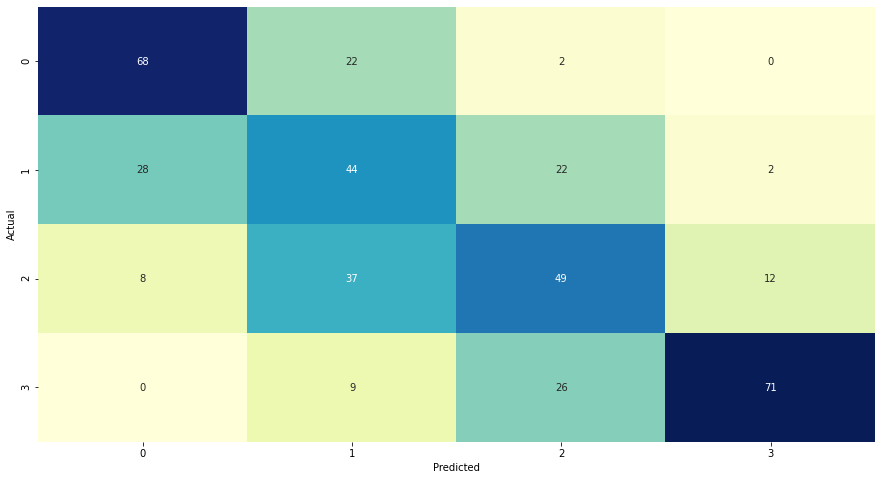

In [119]:
sns.heatmap(cm,annot=True,cmap="YlGnBu",cbar=False,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [120]:
acc_knn = model_knn.score(X_test_knn,y_test_knn)
f1_knn = metrics.f1_score(y_test_knn,y_pred_knn,average='weighted')

In [121]:
knn_metrics = pd.Series({'Algorithm':'KNN',
                            'Accuracy':acc_knn*100,
                            'F1_score': "{:.2f}".format(f1_knn)})

result_table = result_table.append(knn_metrics,ignore_index=True)
result_table

,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,64.500000,0.64
1,Gaussian Naive Bayes,83.500000,0.83
2,KNN,58.000000,0.58


# 7.d Decision Tree

In [122]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(x_train,y_train)

In [123]:
y_pred_dt = dt_model.predict(x_test)

In [124]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        95
           1       0.77      0.75      0.76        92
           2       0.73      0.74      0.73        99
           3       0.88      0.89      0.88       114

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



Text(114.0, 0.5, 'Actual')

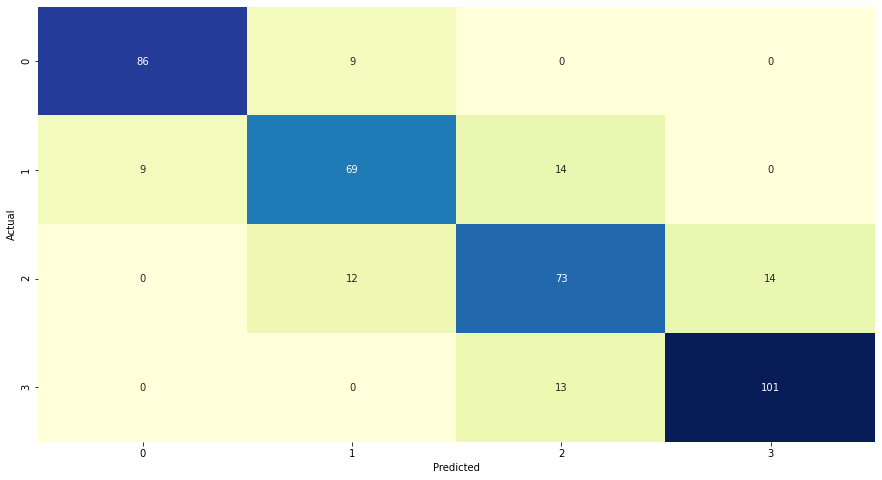

In [125]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm_dt,annot=True,cmap="YlGnBu",cbar=False,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [126]:
acc_dt = dt_model.score(x_test,y_test)
f1_dt = metrics.f1_score(y_test,y_pred_dt,average='weighted')

dt_metrics = pd.Series({'Algorithm':'Decision Tree',
                            'Accuracy':acc_dt*100,
                            'F1_score': "{:.2f}".format(f1_dt)})

result_table = result_table.append(dt_metrics,ignore_index=True)
result_table

,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,64.500000,0.64
1,Gaussian Naive Bayes,83.500000,0.83
2,KNN,58.000000,0.58
3,Decision Tree,82.250000,0.82


# 7.e Random Forest Algorithm

In [127]:
rd = RandomForestClassifier()
rd_model = rd.fit(x_train,y_train)

In [128]:
y_pred_rd = rd_model.predict(x_test)

In [129]:
print(classification_report(y_test,y_pred_rd))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        95
           1       0.82      0.78      0.80        92
           2       0.77      0.74      0.75        99
           3       0.91      0.92      0.91       114

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



In [130]:
y_pred = rd_model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

confusion matrix:
 [[ 94   1   0   0]
 [  7  72  13   0]
 [  0  15  73  11]
 [  0   0   9 105]]


Text(114.0, 0.5, 'Actual')

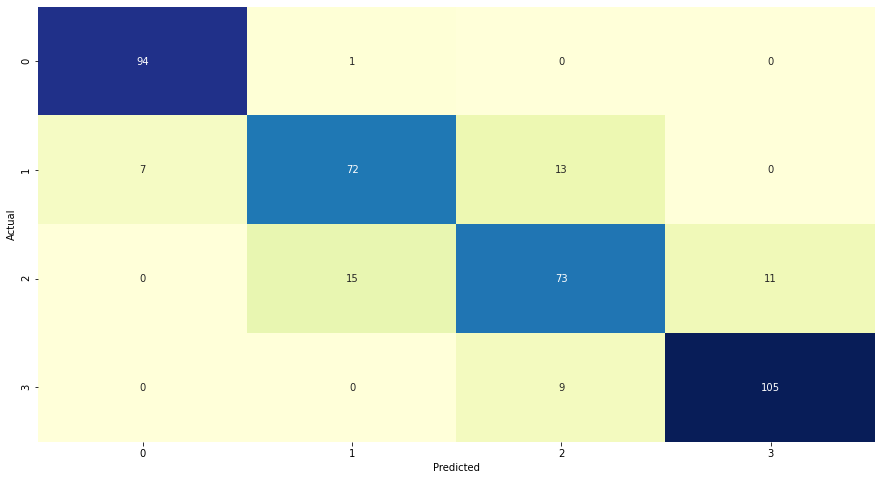

In [131]:
cm_rd = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rd,annot = True,cmap="YlGnBu",cbar=False,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [132]:
acc_rd = rd_model.score(x_test,y_test)
f1_rd= metrics.f1_score(y_test,y_pred_rd,average='weighted')

rd_metrics = pd.Series({'Algorithm':'Random Forest',
                            'Accuracy':acc_rd*100,
                            'F1_score': "{:.2f}".format(f1_rd)})

result_table = result_table.append(rd_metrics,ignore_index=True)
result_table

,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,64.500000,0.64
1,Gaussian Naive Bayes,83.500000,0.83
2,KNN,58.000000,0.58
3,Decision Tree,82.250000,0.82
4,Random Forest,86.000000,0.86


From the above Models we can tell that **Random Forest** is giving the highest accuracies

# 8. Ensemble Techniques

# 8.a.Ada Boost

In [133]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [134]:
y_pred_adaboost = ada_model.predict(x_test)

In [135]:
print(classification_report(y_test,y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.92      0.48      0.63        95
           1       0.53      0.78      0.63        92
           2       0.51      0.85      0.63        99
           3       1.00      0.42      0.59       114

    accuracy                           0.62       400
   macro avg       0.74      0.63      0.62       400
weighted avg       0.75      0.62      0.62       400



In [136]:
cm_adaboost = confusion_matrix(y_test,y_pred_adaboost)
cm_adaboost

array([[46, 49,  0,  0],
       [ 4, 72, 16,  0],
       [ 0, 15, 84,  0],
       [ 0,  0, 66, 48]], dtype=int64)

In [137]:
acc_ada = ada_model.score(x_test,y_test)
f1_ada = metrics.f1_score(y_test,y_pred_adaboost,average='weighted')

ada_metrics = pd.Series({'Algorithm':'Random_forest Ada Boost',
                            'Accuracy':acc_ada*100,
                            'F1_score': "{:.2f}".format(f1_ada)})

result_table = result_table.append(ada_metrics,ignore_index=True)
result_table

,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,64.500000,0.64
1,Gaussian Naive Bayes,83.500000,0.83
2,KNN,58.000000,0.58
3,Decision Tree,82.250000,0.82
4,Random Forest,86.000000,0.86
5,Random_forest Ada Boost,62.500000,0.62


# 8.b.Gradient Boosting

In [138]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

gboost_model.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [139]:
y_pred_gboost = gboost_model.predict(x_test)

In [140]:
print(classification_report(y_test,y_pred_gboost))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        95
           1       0.92      0.86      0.89        92
           2       0.80      0.86      0.83        99
           3       0.91      0.90      0.91       114

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [141]:
cm_gboost = confusion_matrix(y_test,y_pred_gboost)
cm_gboost

array([[ 92,   3,   0,   0],
       [  3,  79,  10,   0],
       [  0,   4,  85,  10],
       [  0,   0,  11, 103]], dtype=int64)

In [142]:
acc_gboost = gboost_model.score(x_test,y_test)
f1_gboost = metrics.f1_score(y_test,y_pred_gboost,average='weighted')

gboost_metrics = pd.Series({'Algorithm':'Random_forest_Gradient Boost',
                            'Accuracy':acc_gboost*100,
                            'F1_score': "{:.2f}".format(f1_gboost)})

result_table = result_table.append(gboost_metrics,ignore_index=True)
result_table

,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,64.500000,0.64
1,Gaussian Naive Bayes,83.500000,0.83
2,KNN,58.000000,0.58
3,Decision Tree,82.250000,0.82
4,Random Forest,86.000000,0.86
5,Random_forest Ada Boost,62.500000,0.62
6,Random_forest_Gradient Boost,89.750000,0.90


# 8.c.XG Boost

In [143]:
x_test[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']] = x_test[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype('int')

In [144]:
x_train[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']] = x_train[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype('int')

In [145]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

xgb_model.fit(x_train, y_train)

[10:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
y_pred_xgboost = xgb_model.predict(x_test)

In [147]:
print(classification_report(y_test,y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        95
           1       0.89      0.89      0.89        92
           2       0.86      0.83      0.85        99
           3       0.92      0.95      0.93       114

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [148]:
cm_xg = confusion_matrix(y_test,y_pred_xgboost)
cm_xg

array([[ 92,   3,   0,   0],
       [  3,  82,   7,   0],
       [  0,   7,  82,  10],
       [  0,   0,   6, 108]], dtype=int64)

In [149]:
acc_xgboost = xgb_model.score(x_test,y_test)
f1_xgboost = metrics.f1_score(y_test,y_pred_xgboost,average='weighted')

xgboost_metrics = pd.Series({'Algorithm':'Random_forest_XG Boost',
                            'Accuracy':acc_xgboost*100,
                            'F1_score': "{:.2f}".format(f1_xgboost)})

result_table = result_table.append(xgboost_metrics,ignore_index=True)
result_table

,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,64.500000,0.64
1,Gaussian Naive Bayes,83.500000,0.83
2,KNN,58.000000,0.58
3,Decision Tree,82.250000,0.82
4,Random Forest,86.000000,0.86
5,Random_forest Ada Boost,62.500000,0.62
6,Random_forest_Gradient Boost,89.750000,0.90
7,Random_forest_XG Boost,91.000000,0.91


# 8.d.RFE

In [150]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
# fit the model
rfe_model_rd = rfe.fit(x_train, y_train)
rfe_model_rd

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [151]:
feat_index = pd.Series(data = rfe_model_rd.ranking_, index = x_train.columns)
feat_index

battery_power     1
blue             11
clock_speed       6
dual_sim         14
fc                8
four_g           12
int_memory        2
m_dep             9
mobile_wt         1
n_cores          10
pc                4
px_height         1
px_width          1
ram               1
sc_h              7
sc_w              5
talk_time         3
three_g          16
touch_screen     13
wifi             15
dtype: int32

In [152]:
signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], dtype='object')


In [153]:
rd_rfe_model = RandomForestClassifier().fit(x_train[signi_feat_rfe],y_train)

In [154]:
y_pred_rd_rfe = rd_rfe_model.predict(x_test[signi_feat_rfe])

In [155]:
print(classification_report(y_test,y_pred_rd_rfe))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.91      0.89      0.90        92
           2       0.88      0.86      0.87        99
           3       0.93      0.96      0.94       114

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [156]:
acc_rd_rfe = rd_rfe_model.score(x_test[signi_feat_rfe],y_test)
f1_rd_rfe = metrics.f1_score(y_test,y_pred_rd_rfe,average='weighted')

rd_rfe_metrics = pd.Series({'Algorithm':'Random_forest RFE',
                            'Accuracy':acc_rd_rfe*100,
                            'F1_score': "{:.2f}".format(f1_rd_rfe)})

result_table = result_table.append(rd_rfe_metrics,ignore_index=True)
result_table

,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,64.500000,0.64
1,Gaussian Naive Bayes,83.500000,0.83
2,KNN,58.000000,0.58
3,Decision Tree,82.250000,0.82
4,Random Forest,86.000000,0.86
5,Random_forest Ada Boost,62.500000,0.62
6,Random_forest_Gradient Boost,89.750000,0.90
7,Random_forest_XG Boost,91.000000,0.91
8,Random_forest RFE,92.250000,0.92


# 9.Model Tuning

# 9.a Grid Search CV

In [157]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'accuracy',verbose=1)

# fit the model on X_train and y_train using fit()
xgb_grid.fit(x_train[signi_feat_rfe], y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Fitting 3 folds for each of 210 candidates, totalling 630 fits
[10:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:

[10:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:10:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:12:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:14:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:15:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:16:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:17:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:17:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:17:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:17:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:18:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:18:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:18:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:19:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:20:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:20:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:20:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:21:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:21:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:21:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:21:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:21:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[10:22:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:22:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:22:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:22:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [158]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_model = xgb_grid_model.fit(x_train[signi_feat_rfe], y_train)


[10:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [159]:
y_pred_xgb_grid = xgb_model.predict(x_test[signi_feat_rfe])

In [160]:
print(classification_report(y_test,y_pred_xgb_grid))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.92      0.93      0.93        92
           2       0.92      0.92      0.92        99
           3       0.96      0.96      0.96       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [161]:
acc_xgboost_grid = xgb_model.score(x_test[signi_feat_rfe],y_test)
f1_xgboost_grid = metrics.f1_score(y_test,y_pred_xgb_grid,average='weighted')

grid_xgboost_metrics = pd.Series({'Algorithm':'RF_XG Boost grid',
                            'Accuracy':acc_xgboost_grid*100,
                            'F1_score': "{:.2f}".format(f1_xgboost_grid)})

result_table = result_table.append(grid_xgboost_metrics,ignore_index=True)
result_table

,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,64.500000,0.64
1,Gaussian Naive Bayes,83.500000,0.83
2,KNN,58.000000,0.58
3,Decision Tree,82.250000,0.82
4,Random Forest,86.000000,0.86
5,Random_forest Ada Boost,62.500000,0.62
6,Random_forest_Gradient Boost,89.750000,0.90
7,Random_forest_XG Boost,91.000000,0.91
8,Random_forest RFE,92.250000,0.92
9,RF_XG Boost grid,94.750000,0.95


# 9.b Feature Importance

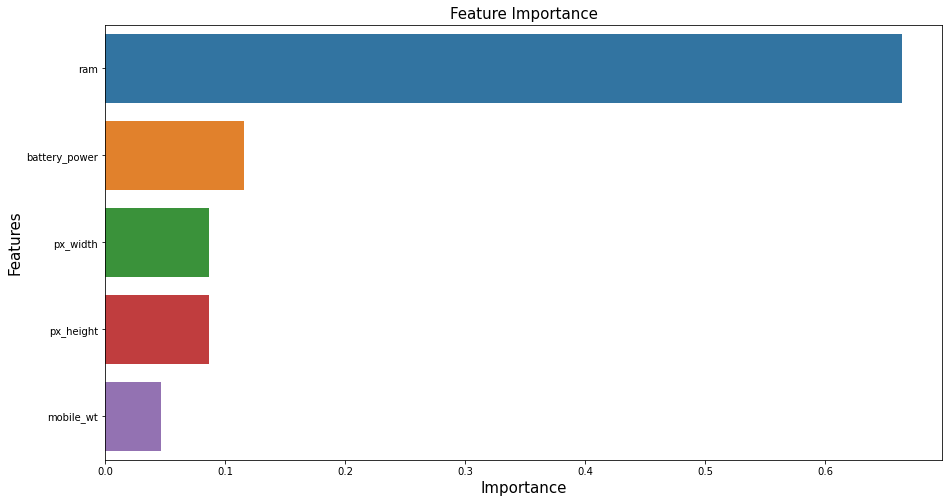

In [162]:
important_features = pd.DataFrame({'Features': x_train[signi_feat_rfe].columns, 
                                   'Importance': rd_rfe_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()


# 10. Cross Validation

In [163]:
from sklearn.model_selection import KFold
model = XGBClassifier()
kfold = KFold(n_splits=10)
results = cross_val_score(model, x_train[signi_feat_rfe], y_train, cv=kfold)

[10:22:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:22:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:22:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:22:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [164]:
print('All scores: ', results)
print("\nMinimum score obtained: ", round(np.min(results), 4))
print("Maximum score obtained: ", round(np.max(results), 4))
print("Average score obtained: ", round(np.mean(results), 4))

All scores:  [0.89375 0.91875 0.90625 0.9     0.875   0.925   0.9     0.89375 0.91875
 0.90625]

Minimum score obtained:  0.875
Maximum score obtained:  0.925
Average score obtained:  0.9038


# 11.Stacking

In [165]:
base_learners = [('rf_model', RandomForestClassifier()),
                 ('dt_model', DecisionTreeClassifier()),
                 ('NB_model', GaussianNB(),
                'XG Boost',XGBClassifier())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = XGBClassifier())

# fit the model on train dataset
stack_model.fit(x_train[signi_feat_rfe], y_train)


[10:22:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(estimators=[('rf_model', RandomForestClassifier()),
                               ('dt_model', DecisionTreeClassifier()),
                               ('NB_model', GaussianNB(), 'XG Boost',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_...
                                                 importance_type='gain',
                                                 interaction_constraints=None,
              

In [166]:
y_pred_stack=stack_model.predict(x_test[signi_feat_rfe])

In [167]:
print(classification_report(y_test,y_pred_stack))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        95
           1       0.89      0.93      0.91        92
           2       0.89      0.86      0.88        99
           3       0.94      0.95      0.94       114

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.92       400



In [168]:
acc_stack = stack_model.score(x_test[signi_feat_rfe],y_test)
f1_stack = metrics.f1_score(y_test,y_pred_stack,average='weighted')

stack_metrics = pd.Series({'Algorithm':'Stacking',
                            'Accuracy':acc_stack*100,
                            'F1_score': "{:.2f}".format(f1_stack)})

result_table = result_table.append(stack_metrics,ignore_index=True)
result_table


,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,64.500000,0.64
1,Gaussian Naive Bayes,83.500000,0.83
2,KNN,58.000000,0.58
3,Decision Tree,82.250000,0.82
4,Random Forest,86.000000,0.86
5,Random_forest Ada Boost,62.500000,0.62
6,Random_forest_Gradient Boost,89.750000,0.90
7,Random_forest_XG Boost,91.000000,0.91
8,Random_forest RFE,92.250000,0.92
9,RF_XG Boost grid,94.750000,0.95


# 12.Deployment

In [176]:
rf = XGBClassifier(n_estimators=500)
rf.fit(x_train[signi_feat_rfe], y_train)
rf

[10:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [177]:
import pickle
filename = 'team8.pras'
pickle.dump(rf, open(filename, 'wb'))

In [179]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test[signi_feat_rfe],y_test)
print(result) 

0.9475


In [180]:
import joblib
filename = 'finalized_model_joblib.sav'
joblib.dump(rf, filename)

['finalized_model_joblib.sav']

In [181]:
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test[signi_feat_rfe],y_test)
print(result)

0.9475
